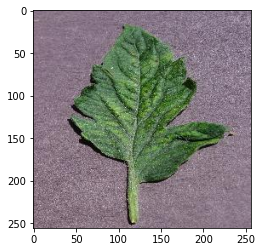

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('/content/Tomato_Tomato_mosaic_virus15.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [2]:
print(image.dtype, image.shape)

uint8 (256, 256, 3)


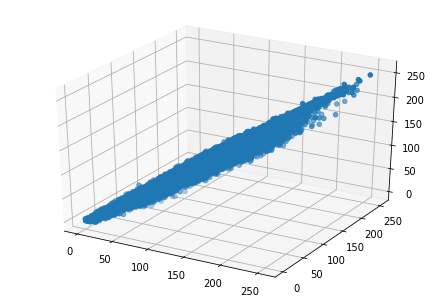

In [3]:
# showing the RGB color scatter

r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [4]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
print(pixel_vals.dtype, pixel_vals.shape)

uint8 (65536, 3)


In [5]:
# Convert to float type

Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

float32 (65536, 3)


In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [8]:
print(center)

[[137.25702  126.07092  133.39415 ]
 [ 66.301895  91.80932   57.950638]]


In [9]:
# back convert data into integer 8-bit values

center = np.uint8(center)
center

array([[137, 126, 133],
       [ 66,  91,  57]], dtype=uint8)

In [10]:
# back to cluster

segmented_data = center[label.flatten()]
segmented_data

array([[137, 126, 133],
       [137, 126, 133],
       [137, 126, 133],
       ...,
       [137, 126, 133],
       [137, 126, 133],
       [137, 126, 133]], dtype=uint8)

In [11]:
# reshape data into the original image dimensions

segmented_image = segmented_data.reshape((image.shape))
segmented_image

array([[[137, 126, 133],
        [137, 126, 133],
        [137, 126, 133],
        ...,
        [137, 126, 133],
        [137, 126, 133],
        [137, 126, 133]],

       [[137, 126, 133],
        [137, 126, 133],
        [137, 126, 133],
        ...,
        [137, 126, 133],
        [137, 126, 133],
        [137, 126, 133]],

       [[137, 126, 133],
        [137, 126, 133],
        [137, 126, 133],
        ...,
        [137, 126, 133],
        [137, 126, 133],
        [137, 126, 133]],

       ...,

       [[137, 126, 133],
        [137, 126, 133],
        [137, 126, 133],
        ...,
        [137, 126, 133],
        [137, 126, 133],
        [137, 126, 133]],

       [[137, 126, 133],
        [137, 126, 133],
        [137, 126, 133],
        ...,
        [137, 126, 133],
        [137, 126, 133],
        [137, 126, 133]],

       [[ 66,  91,  57],
        [137, 126, 133],
        [137, 126, 133],
        ...,
        [137, 126, 133],
        [137, 126, 133],
        [137, 126, 133]]

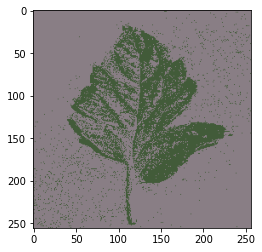

In [12]:
# visualize the segmented image

plt.imshow(segmented_image)

In [20]:
from PIL import Image
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

In [21]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/Tomato_Tomato_mosaic_virus15.jpg")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

PSNR value is 28.925236038822003 dB
